In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orditem = pd.read_csv('./datasets/olist_order_items_dataset.csv')

In [3]:
#Vemos la dimensión del dataset.
orditem.shape

(112650, 7)

In [5]:
#Las columnas poseen información relacionada al producto vendido.
orditem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
#Confirmo la inexistencia de valores nulos.
orditem.isnull().sum().sort_values()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [7]:
#Verifico que no hay valores duplicados.
orditem.duplicated().sum()

0

In [13]:
#Anáisis preliminar de los datos numéricos de las 2 columnas más relevantes. Vemos valores extremos, rango de datos y en especial outliers (relación de mediana y media).
orditem[['price','freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [11]:
#Veo el dataset importado.
orditem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Comienzo el análisis gráfico de los datos.

<Figure size 1000x1000 with 0 Axes>

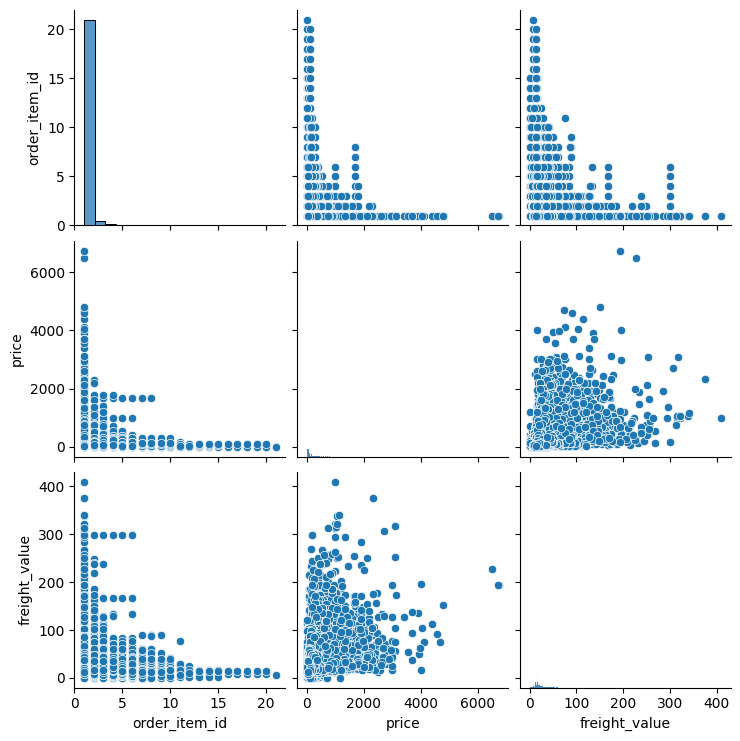

In [14]:
#Grafico la distribución de los datos numéricos en pares ordenados.
plt.figure(figsize=(10,10))
sns.pairplot(orditem)

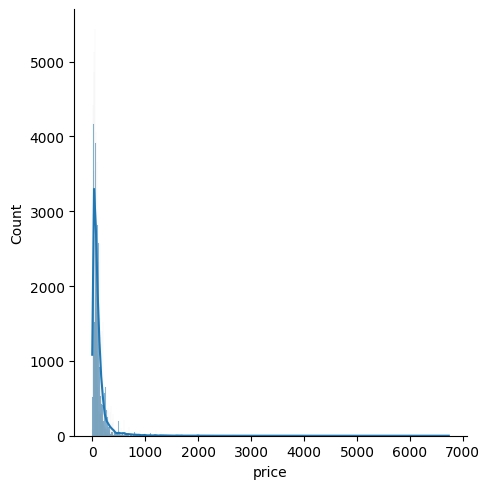

In [45]:
#Observamos mejor la distribución de valores dentro de price.
sns.displot(data=orditem, x="price", kde=True)

<AxesSubplot:title={'center':'Precio del producto'}>

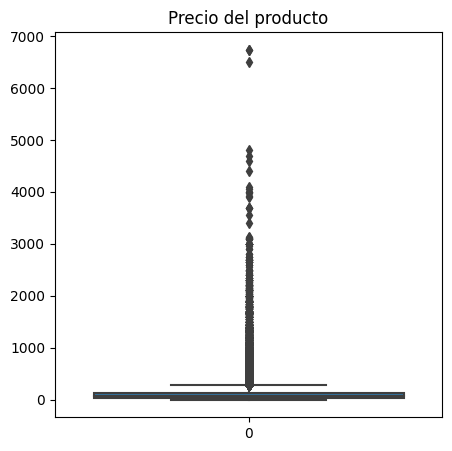

In [17]:
#El gráfico de caja apenas puede graficar la distribución de valores de Price.
plt.figure(figsize=(5,5))
plt.title("Precio del producto")
sns.boxplot(orditem['price'])

<AxesSubplot:title={'center':'Precio del producto'}, ylabel='price'>

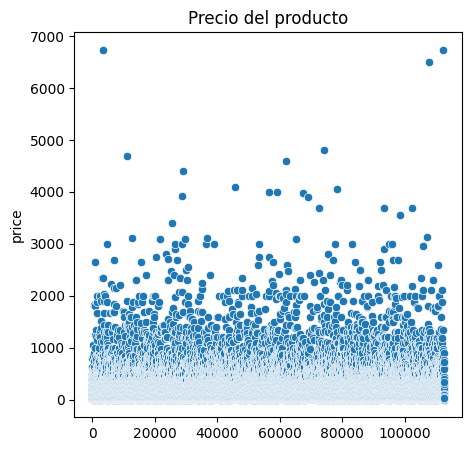

In [16]:
#Con un gráfico de tipo scatter podemos ver mejor la distribución.
plt.figure(figsize=(5,5))
plt.title("Precio del producto")
sns.scatterplot(orditem['price'])

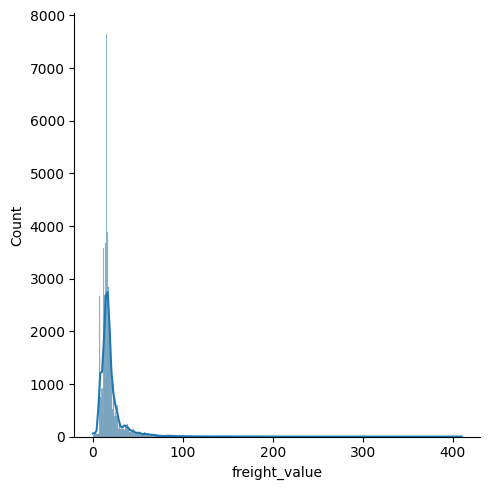

In [46]:
#Observamos mejor la distribución de valores dentro de freight_value.
sns.displot(data=orditem, x="freight_value", kde=True)

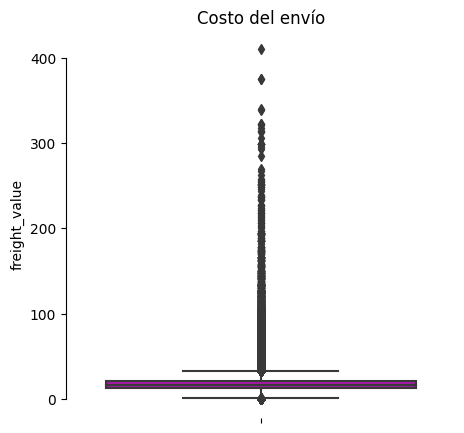

In [20]:
#El diagrama de caja muestra mejor la distribución de datos que tenemos.
plt.figure(figsize=(5,5))
plt.title("Costo del envío")
sns.boxplot(y="freight_value",
            palette=["m", "g"],
            data=orditem)
sns.despine(offset=1, trim=True)

<AxesSubplot:title={'center':'Cantidad de cuotas'}, ylabel='freight_value'>

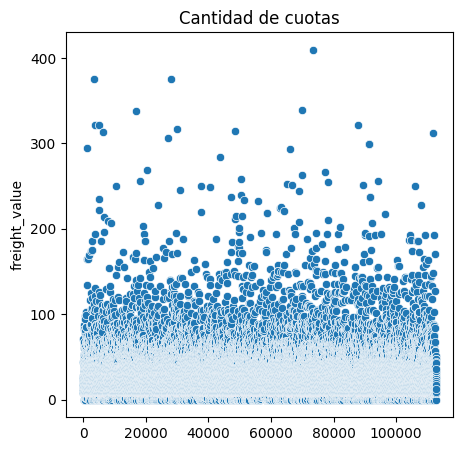

In [19]:
#El scatter muestra mejor la concentración de datos.
plt.figure(figsize=(5,5))
plt.title("Cantidad de cuotas")
sns.scatterplot(orditem['freight_value'])

Conclusiones:

- Price: con una media casi en el tercer cuartil, vemos que la distribución de datos está concentrada dentro del primer cuartil. Hay valores outliers sin los cuales la distribución sería normal.

- Freight_value: casi la totalidad de los datos están concentrados en el primer cuartil. Pasando el segundo cuartil, podría decirse que son todos datos outliers.


ETL (recomendado):

- Renombrar columnas.
- Eliminar datos outliers (4to. cuartil) para dar mejor distribución a los datos.